Refer the folder structure containing image data for two classes, **Cars** and **Bikes**, and are required to refer to this structure before beginning the implementation. The task involves loading all RGB images from both folders, resizing them to a fixed size, normalizing pixel values, and converting each image into a suitable input format for a deep neural network. Appropriate class labels must be assigned, and the combined dataset should be shuffled and split into training and testing sets in an 80:20 ratio. A deep neural network model must then be designed by specifying the input layer, one or more hidden layers with appropriate activation functions, and an output layer for binary classification. The model should be trained using forward propagation, backpropagation, and an optimization algorithm such as gradient descent or its variants, while monitoring the training loss. After training for a fixed number of epochs, predictions must be generated for both training and testing data to compute accuracy. Finally, the loss versus epochs graph should be plotted and the training and testing accuracy reported.


In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
DATASET_PATH="transport"
CATEGORIES=["bike","cars"]
IMG_SIZE=64

In [3]:
def load_dataset(base_path,categories,img_size):
    X=[] #image data (features)
    Y=[] #labels (0 or 1)
    for label, category in enumerate(categories):
        folder_path=os.path.join(base_path,category)
        # verify if that folder exists or not
        assert os.path.exists(folder_path) , f"{folder_path} not found"
        for img_name in os.listdir(folder_path):
            img_path=os.path.join(folder_path,img_name)
            try:
                img=Image.open(img_path).convert("RGB") # Converts grayscale / RGBA → RGB
                img=img.resize((img_size,img_size)) #Resizes image to 64×64
                # to perform normalisation we need to convert it to numoy array first
                img=np.array(img)/255.0
                img=img.flatten() #mage shape before: (64, 64, 3) -> After flatten: (12288,)
                X.append(img)
                Y.append(label)
            except:
                print(f"Error loading image: {img_path}")
    return np.array(X) ,np.array(Y)

In [4]:
# now lets call the function to load the dataset
X, Y = load_dataset(DATASET_PATH, CATEGORIES, IMG_SIZE)
print("Total samples:", X.shape[0])
print("Feature vector size:", X.shape[1])

Total samples: 785
Feature vector size: 12288


In [6]:
# now we have to shuffle the dataset
indices=np.random.permutation(X.shape[0])
X=X[indices]
Y=Y[indices]
# lets define the split variable
split=int(0.8*X.shape[0])
X_train=X[:split].T # shape of X was (200,12288) -> after transpose: (12288, 160)
Y_train=Y[:split].reshape(1,-1) # shape of Y was (200,) -> after reshape: (1, 160)
X_test=X[split:].T
Y_test = Y[split:].reshape(1, -1)

print("Train set shape:", X_train.shape)
print("Train set shape of y:", Y_train.shape)
print("Test set shape:", X_test.shape)
print("Test set shape of y:", Y_test.shape)

Train set shape: (12288, 628)
Train set shape of y: (1, 628)
Test set shape: (12288, 157)
Test set shape of y: (1, 157)


In [8]:
# parameter initialisation
n_h=20 # number of neurons in the hidden layer
m = X_train.shape[1]
W1=np.random.randn(n_h,X_train.shape[0])*0.01
b1=np.zeros((n_h,1))
W2=np.random.randn(1,n_h)*0.01 # here the shape of Z1=(n_h,m),A1=(n_h,m) so, W2 should be (1,n_h) as W2.A1 we shud do
b2=np.zeros((1,1))
losses=[]
# why b1 has n_h,1 and b2 has 1,1 because the hidden layer has n_h neurons so there shud be n_h number of bias
# whereas b2 is the output layer which has only one neuron so it will have only one bias term
learning_rate=0.01
for i in range(2000):
    # forward pass
    Z1=np.dot(W1,X_train)+b1
    A1=np.maximum(0,Z1) # relu activation function
    Z2=np.dot(W2,A1)+b2
    A2=1/(1+np.exp(-Z2)) # sigmoid function

    # lets calculate the cost
    cost=-np.mean(Y_train*np.log(A2)+(1-Y_train)*np.log(1-A2))
    losses.append(cost)
    # backward propagation very very important this is
    dZ2=A2-Y_train
    dW2=np.dot(dZ2, A1.T)/m
    db2=np.mean(dZ2,axis=1,keepdims=True) # axis=1 coloumn wise mean
    # without keepsims shape would be (1,) , after using that it becomes (1,1) preserves the shape
    dA1=np.dot(W2.T,dZ2)
    dZ1=dA1*(Z1 > 0)
    dW1=np.dot(dZ1,X_train.T)/m
    db1=np.mean(dZ1,axis=1,keepdims=True)

    # update rule
    W1-=learning_rate*dW1
    b1-=learning_rate*db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    if i%500==0:
        print(f"cost at iteration {i}:{cost:.4f}")

cost at iteration 0:0.6938
cost at iteration 500:0.5547
cost at iteration 1000:0.5137
cost at iteration 1500:0.4619


In [9]:
# prediction
def predict(X):
    A1 = np.maximum(0, np.dot(W1, X) + b1)
    A2 = 1 / (1 + np.exp(-(np.dot(W2, A1) + b2)))
    return (A2 > 0.5).astype(int)

train_acc= 100-np.mean(np.abs(predict((X_train)-Y_train)))*100
test_acc  = 100 - np.mean(np.abs(predict(X_test) - Y_test)) * 100
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 80.73248407643312
Test Accuracy: 65.60509554140128


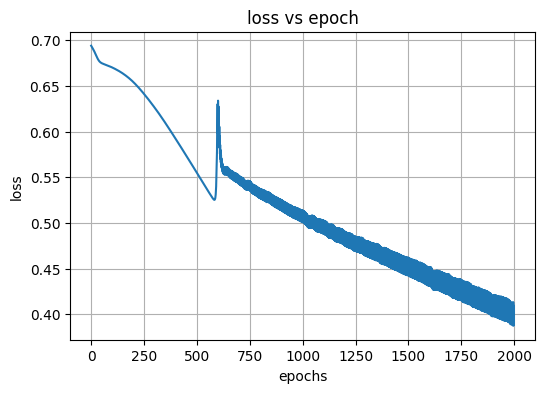

In [10]:
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs epoch")
plt.grid(True)
plt.show()